In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('PotatoPrice.csv')

In [3]:
df

,potato_kg,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,55
5,6,75
6,7,90
7,8,100
8,9,115
9,10,120


In [4]:
df.head()

,potato_kg,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,55


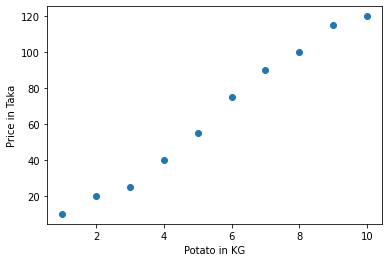

In [5]:
plt.xlabel('Potato in KG')
plt.ylabel('Price in Taka')
plt.scatter(df.potato_kg,df.price)
plt.show()

In [6]:
X = df[['potato_kg']]

In [7]:
y = df['price']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

In [9]:
X_train

,potato_kg
6,7
3,4
1,2
0,1
7,8
4,5
9,10


In [10]:
X_test

,potato_kg
8,9
2,3
5,6


In [11]:
y_train

6     90
3     40
1     20
0     10
7    100
4     55
9    120
Name: price, dtype: int64

In [12]:
y_test

8    115
2     25
5     75
Name: price, dtype: int64

In [13]:
model = keras.Sequential([keras.layers.Dense(1, input_shape=[1], activation='linear')])
model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='sgd',loss='mean_squared_error', metrics=['accuracy'])

In [16]:
model.fit(X_train,y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 586ms/step - loss: 5669.7822 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 366.6040 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 48.6769 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 29.5006 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 28.2286 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 28.0308 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 27.8985 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 27.7713 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 27.6456 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 27.

In [17]:
model.predict(X_test)

array([[109.70896 ],
       [ 33.13627 ],
       [ 71.422615]], dtype=float32)

In [18]:
y_test

8    115
2     25
5     75
Name: price, dtype: int64

In [19]:
test_loss, test_acc= model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 227ms/step - loss: 35.6639 - accuracy: 0.0000e+00


In [20]:
model.predict([10])

array([[122.47108]], dtype=float32)

In [40]:
x=float(input('To know the potato price,Enter the potato killogram upto 1 : '))

my_prediction=model.predict([[x]])
price=np.asscalar(np.array(my_prediction)) 
print('So',x,' killogram potato price is =',price ,' Taka')

To know the potato price,Enter the potato killogram upto 1 : 12


<ipython-input-40-d31b52187347>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  price=np.asscalar(np.array(my_prediction)) #convert vector into scalar using this one line only


So 12.0  killogram potato price is = 147.9953155517578  Taka
